### Import Library

In [3]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
plt.style.use('bmh')

In [4]:
#Load the data
df = pd.read_csv('TSLA.csv')

In [5]:
df.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2021-03-10,700.299988,717.849976,655.059998,668.059998,668.059998,60605700
1,2021-03-11,699.400024,702.500000,677.179993,699.599976,699.599976,36253900
2,2021-03-12,670.000000,694.880005,666.140015,693.729980,693.729980,33583800
3,2021-03-15,694.090027,713.179993,684.039978,707.940002,707.940002,29335600
4,2021-03-16,703.349976,707.919983,671.000000,676.880005,676.880005,32195700


In [10]:
#Get the number of trading days
df.shape

(253, 7)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 253 entries, 0 to 252
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       253 non-null    object 
 1   Open       253 non-null    float64
 2   High       253 non-null    float64
 3   Low        253 non-null    float64
 4   Close      253 non-null    float64
 5   Adj Close  253 non-null    float64
 6   Volume     253 non-null    int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 14.0+ KB


In [9]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,253.000000,253.000000,253.000000,253.000000,253.000000,2.530000e+02
mean,806.713320,824.132408,788.038262,806.397864,806.397864,2.601816e+07
std,173.921424,179.923433,165.857288,172.938081,172.938081,9.599674e+06
min,552.549988,566.210022,546.979980,563.460022,563.460022,9.800600e+06
25%,674.989990,687.510010,660.219971,670.969971,670.969971,1.892490e+07
50%,741.000000,753.770020,730.539978,743.000000,743.000000,2.437160e+07
75%,928.179993,946.270020,903.210022,931.250000,931.250000,3.109920e+07
max,1234.410034,1243.489990,1217.000000,1229.910034,1229.910034,6.285210e+07


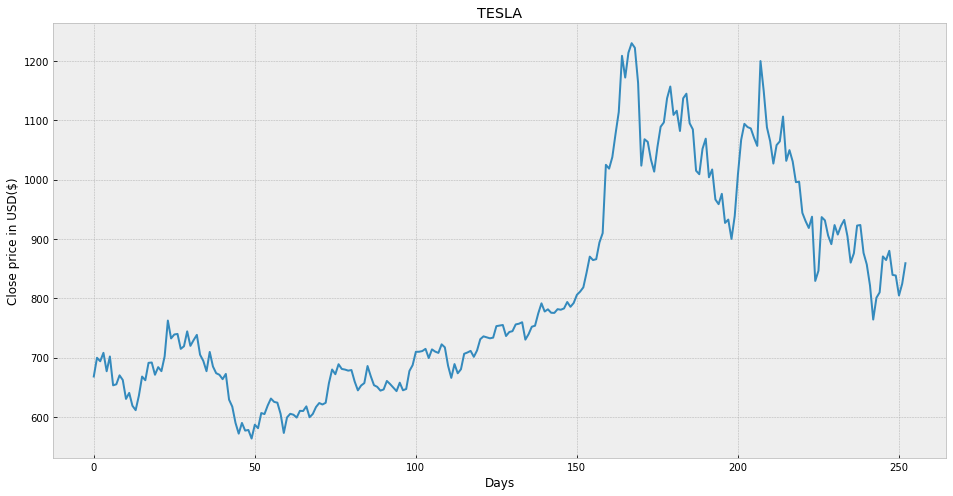

In [12]:
#Visualize the close data
plt.figure(figsize=(16,8))
plt.title('TESLA')
plt.xlabel('Days')
plt.ylabel('Close price in USD($)')
plt.plot(df['Close'])
plt.show()

In [13]:
#Get the close price
df = df[['Close']]
df.head()

,Close
0,668.059998
1,699.599976
2,693.729980
3,707.940002
4,676.880005


In [16]:
#Create a variable to predict the 'x' days out into the future
future_days = 25

#Create a new column (target data) shifted 'x' days up
df['Prediction'] = df[['Close']].shift(-future_days)
df.tail()

,Close,Prediction
248,839.289978,NaN
249,838.289978,NaN
250,804.580017,NaN
251,824.400024,NaN
252,858.969971,NaN


In [18]:
#Create the feature data set (X) & convert it to a numpy array and remove the last 'x' rows/days
X = np.array(df.drop(['Prediction'], 1))[:-future_days]
print(X)

[[ 668.059998]
 [ 699.599976]
 [ 693.72998 ]
 [ 707.940002]
 [ 676.880005]
 [ 701.809998]
 [ 653.159973]
 [ 654.869995]
 [ 670.      ]
 [ 662.159973]
 [ 630.27002 ]
 [ 640.390015]
 [ 618.710022]
 [ 611.289978]
 [ 635.619995]
 [ 667.929993]
 [ 661.75    ]
 [ 691.049988]
 [ 691.619995]
 [ 670.969971]
 [ 683.799988]
 [ 677.02002 ]
 [ 701.97998 ]
 [ 762.320007]
 [ 732.22998 ]
 [ 738.849976]
 [ 739.780029]
 [ 714.630005]
 [ 718.98999 ]
 [ 744.119995]
 [ 719.690002]
 [ 729.400024]
 [ 738.200012]
 [ 704.73999 ]
 [ 694.400024]
 [ 677.      ]
 [ 709.440002]
 [ 684.900024]
 [ 673.599976]
 [ 670.940002]
 [ 663.539978]
 [ 672.369995]
 [ 629.039978]
 [ 617.200012]
 [ 589.890015]
 [ 571.690002]
 [ 589.73999 ]
 [ 576.830017]
 [ 577.869995]
 [ 563.460022]
 [ 586.780029]
 [ 580.880005]
 [ 606.440002]
 [ 604.690002]
 [ 619.130005]
 [ 630.849976]
 [ 625.219971]
 [ 623.900024]
 [ 605.119995]
 [ 572.840027]
 [ 599.049988]
 [ 605.130005]
 [ 603.590027]
 [ 598.780029]
 [ 610.119995]
 [ 609.890015]
 [ 617.690

In [19]:
X.shape

(228, 1)

In [20]:
#Create the target data set (y) & convert it to a numpy array & get all of the target values except the last 'x' rows/days
y = np.array(df['Prediction'])[:-future_days]
print(y)

[ 738.849976  739.780029  714.630005  718.98999   744.119995  719.690002
  729.400024  738.200012  704.73999   694.400024  677.        709.440002
  684.900024  673.599976  670.940002  663.539978  672.369995  629.039978
  617.200012  589.890015  571.690002  589.73999   576.830017  577.869995
  563.460022  586.780029  580.880005  606.440002  604.690002  619.130005
  630.849976  625.219971  623.900024  605.119995  572.840027  599.049988
  605.130005  603.590027  598.780029  610.119995  609.890015  617.690002
  599.359985  604.869995  616.599976  623.309998  620.830017  623.710022
  656.570007  679.820007  671.869995  688.719971  680.76001   679.700012
  677.919983  678.900024  659.580017  644.650024  652.809998  656.950012
  685.700012  668.539978  653.380005  650.599976  644.219971  646.219971
  660.5       655.289978  649.26001   643.380005  657.619995  644.780029
  646.97998   677.349976  687.200012  709.669983  709.73999   710.919983
  714.630005  699.099976  713.76001   709.98999   7

In [22]:
y.shape

(228,)

### Split the Data

In [23]:
#Split the data into 75% training and 25% testing
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### Model Creation

In [25]:
#Create the model
#Create decision tree regressor model
tree = DecisionTreeRegressor().fit(x_train, y_train)
print()

#Create linear Regression model
lr = LinearRegression().fit(x_train, y_train)

In [27]:
#Get the last 'x' rows of the feature data set
x_future = df.drop(['Prediction'], 1)[:-future_days]
x_future = x_future.tail(future_days)
x_future = np.array(x_future)
x_future

array([[1088.469971],
       [1086.189941],
       [1070.339966],
       [1056.780029],
       [1199.780029],
       [1149.589966],
       [1088.119995],
       [1064.699951],
       [1026.959961],
       [1058.119995],
       [1064.400024],
       [1106.219971],
       [1031.560059],
       [1049.609985],
       [1030.51001 ],
       [ 995.650024],
       [ 996.27002 ],
       [ 943.900024],
       [ 930.      ],
       [ 918.400024],
       [ 937.409973],
       [ 829.099976],
       [ 846.349976],
       [ 936.719971],
       [ 931.25    ]])

In [30]:
#Show the model tree prediction
tree_prediction = tree.predict(x_future)
print(tree_prediction)

[ 905.659973 1026.959961  923.320007  922.429993  922.        932.
  904.549988  923.390015  875.76001   922.429993  923.390015  876.349976
  856.97998   821.530029  856.97998   846.349976  846.349976  829.099976
  858.969971  879.890015  829.099976  838.289978  804.580017  829.099976
  858.969971]


In [31]:
#Show the model linear prediction
lr_prediction = lr.predict(x_future)
print(lr_prediction)

[1030.34473345 1028.70854893 1017.33436361 1007.60354471 1110.2225394
 1074.2053799  1030.0935853  1013.28700228  986.20420624 1008.56512487
 1013.07177007 1043.08240587  989.50530717 1002.45821109  988.75177589
  963.73571492  964.18063357  926.59912069  916.62425013  908.29992933
  921.94176048  844.21684435  856.59570909  921.44660446  917.52126932]


<ipython-input-35-32b224ff8a09>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


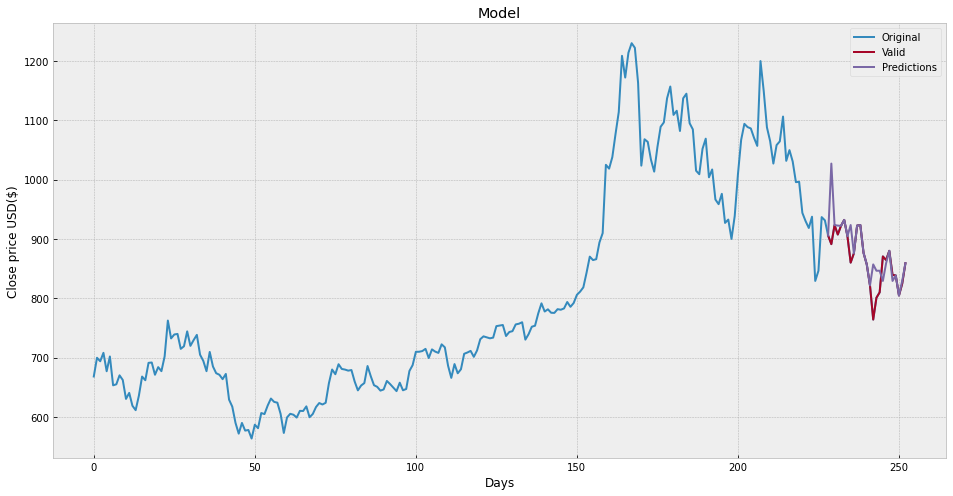

In [35]:
#Visualize the data
predictions = tree_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Predictions'])
plt.show()

<ipython-input-36-107775586d0a>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Predictions'] = predictions


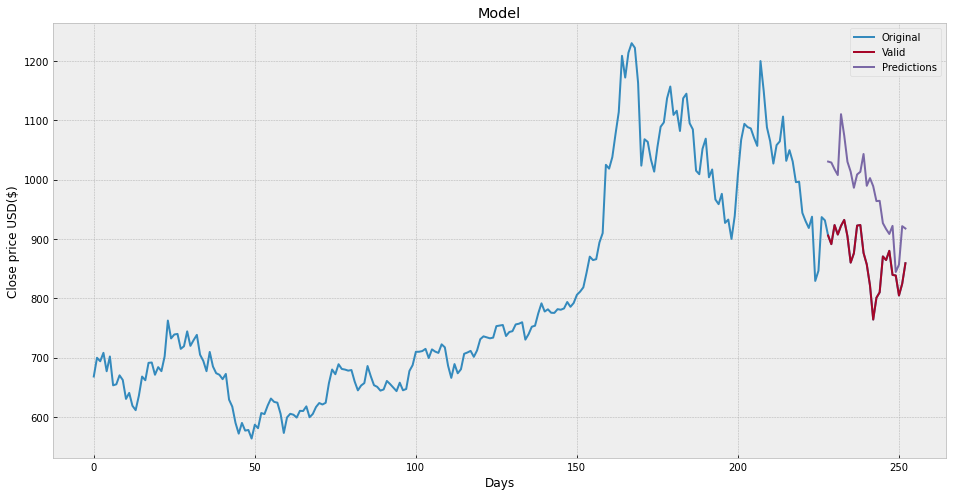

In [36]:
#Visualize the data
predictions = lr_prediction

valid = df[X.shape[0]:]
valid['Predictions'] = predictions
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Days')
plt.ylabel('Close price USD($)')
plt.plot(df['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Original', 'Valid', 'Predictions'])
plt.show()